[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/morphology.ipynb)

In [0]:
import numpy as np
from scipy import ndimage
from scipy import misc
from scipy import signal

In [3]:
el = ndimage.generate_binary_structure(2, 1)
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [4]:
#Erosion
a = np.zeros((7,7),dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [5]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [6]:
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [10]:
#Dilation
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [11]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [12]:
#Opening
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [13]:
#Opening removes small objects
ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [14]:
#Opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [16]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

In [0]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.)* np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
mask = sig > 1

In [22]:
labels, nb = ndimage.label(mask)
nb

8

In [23]:
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


array([190.,  45., 424., 278., 459., 190., 549., 424.])

In [24]:
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


array([ 1.80238238,  1.13527605,  5.51954079,  2.49611818,  6.71673619,
        1.80238238, 16.76547217,  5.51954079])

In [25]:
ndimage.find_objects(labels==4)

[(slice(30, 48, None), slice(30, 48, None))]

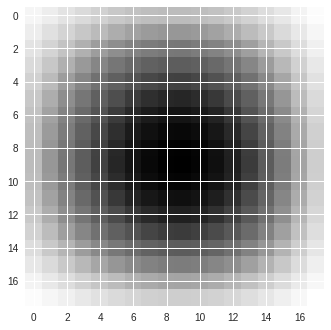

In [26]:
sl = ndimage.find_objects(labels==4)
import pylab as pl
pl.imshow(sig[sl[0]])